# Результаты экспериментов

1. Базовая модель

```
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', input_shape = (9,)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(2)])
```

***3-я итерация.*** loss: 0.0038 - accuracy: 0.7128 - val_loss: 0.0055 - val_accuracy: 0.7273

Параметры для модели:
1. split_percent = 0.9
2. BATCH_SIZE = 12
3. EPOCHS = 30
4. NN_optimizer = 'adam'
5. NN_loss = 'mse'

**4-я итерация.** loss: 0.0552 - accuracy: 0.6667 - val_loss: 0.0516 - val_accuracy: 0.6818
1. split_percent = 0.9
2. BATCH_SIZE = 12
3. EPOCHS = 45
4. NN_optimizer = 'SGD'
5. NN_loss = 'MeanAbsoluteError'

**5-я итерация.**  loss: 0.0057 - accuracy: 0.6462 - val_loss: 0.0044 - val_accuracy: 0.6818
1. split_percent = 0.9
2. BATCH_SIZE = 12
3. EPOCHS = 45
4. NN_optimizer = 'SGD'
5. NN_loss = 'mse'

**6-я итерация.**  loss: 0.0566 - accuracy: 0.4923 - val_loss: 0.0592 - val_accuracy: 0.6818
1. split_percent = 0.9
2. BATCH_SIZE = 12
3. EPOCHS = 30
4. NN_optimizer = 'adam'
5. NN_loss = 'MeanAbsoluteError'

***7-я итерация.*** loss: 0.0033 - accuracy: 0.7128 - val_loss: 0.0058 - val_accuracy: 0.7273

Параметры для модели:
1. split_percent = 0.9
2. BATCH_SIZE = 10
3. EPOCHS = 33
4. NN_optimizer = 'adam'
5. NN_loss = 'mse'


2. Базовая модель

```
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu', input_shape = (9,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2)])
```

**8-я итерация.** loss: 0.0072 - accuracy: 0.5692 - val_loss: 0.0045 - val_accuracy: 0.8182
Параметры для модели:
1. split_percent = 0.9
2. BATCH_SIZE = 10
3. EPOCHS = 32
4. NN_optimizer = 'adam'
5. NN_loss = 'mse'






Подключим Гугл.Диск для сохранения и загрузки моделей

In [1]:
from google.colab import drive
drive.mount('/content/drive')
! pip install pyyaml h5py  # Требуется для сохранения и загрузки моделей в HDF5-формате

Mounted at /content/drive


Настройки

In [2]:
number_of_interations = 8 #Номер итерации для сохранения и загрузки готовой модели
split_percent = 0.9 # Процент данных для обучения

BATCH_SIZE = 10 # Размер пакета для обучения
EPOCHS = 32 # Количество эпох обучения
NN_optimizer = 'adam' # Оптимизатор для модели НС
NN_loss = 'mse' # Функция потерь
csv_file = 'https://raw.githubusercontent.com/AnLiMan/Machine-Learning-Course/main/Datasets/Dataset_4.csv'  # Ссылка на датасет
save_path = "/content/drive/My Drive/Files for colab/NN for diss/NN_model_" + str(number_of_interations) + ".h5" # Путь для сохранения и загрузки моделей нейронки с гугл диска
print('Текущий номер для сохранения модели, чекпоинтов, а также загрузки существующей модели с облака: ', number_of_interations)

Текущий номер для сохранения модели, чекпоинтов, а также загрузки существующей модели с облака:  8


# Библиотеки

In [3]:
import pandas as pd
import numpy as np

import tensorflow as tf
from keras import layers
from tensorflow import keras
import math
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import time

# Подготовка данных

## Загрузим датасет, выведем некоторую информацию и совершим серию проверок

In [4]:
df = pd.read_csv(csv_file) # Прочтём датасет
df.head() # Выведем заголовок

,AngleServo,ax,ay,az,gx,gy,gz,temp,Deviation,V1,V2
0,0.852,0.124,-0.052,0.437,-0.016,-0.016,-0.016,0.941,0.0,0.788,0.788
1,0.852,0.040,-0.008,-0.008,-0.008,-0.008,0.000,0.940,0.0,0.780,0.780
2,0.852,0.013,-0.031,-0.031,-0.031,-0.031,0.000,0.948,0.0,0.768,0.768
3,0.852,-0.003,-0.048,0.597,-0.018,0.000,-0.001,0.940,0.0,0.752,0.752
4,0.852,-0.034,-0.007,0.011,0.000,0.000,-0.008,0.966,0.0,0.800,0.800


In [5]:
df.dtypes # Используемые типы данных

AngleServo    float64
ax            float64
ay            float64
az            float64
gx            float64
gy            float64
gz            float64
temp          float64
Deviation     float64
V1            float64
V2            float64
dtype: object

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AngleServo  217 non-null    float64
 1   ax          217 non-null    float64
 2   ay          217 non-null    float64
 3   az          217 non-null    float64
 4   gx          217 non-null    float64
 5   gy          217 non-null    float64
 6   gz          217 non-null    float64
 7   temp        217 non-null    float64
 8   Deviation   217 non-null    float64
 9   V1          217 non-null    float64
 10  V2          217 non-null    float64
dtypes: float64(11)
memory usage: 18.8 KB
None


In [ ]:
print(df.shape)

(217, 11)


Проверим наличие отсутствующих значений.

In [ ]:
print(df.isna().sum())

AngleServo    0
ax            0
ay            0
az            0
gx            0
gy            0
gz            0
temp          0
Deviation     0
V1            0
V2            0
dtype: int64


Проверим на дубликаты

In [ ]:
print(df.duplicated(keep = False).value_counts())
print(df[df.duplicated(keep = False)])

False    217
dtype: int64
Empty DataFrame
Columns: [AngleServo, ax, ay, az, gx, gy, gz, temp, Deviation, V1, V2]
Index: []


Выкинем дубликаты

In [ ]:
df = df.drop_duplicates(keep = 'first').copy()
print(df.shape)

(217, 11)


Сбросим индекс dataframe

In [ ]:
df = df.reset_index(drop = True)

Выделим колонки из датасета, которые нужно будет предсказывать в будущем (Y).

In [7]:
target_names = ['V1', 'V2']
y = df[target_names]
y.head()

,V1,V2
0,0.788,0.788
1,0.780,0.780
2,0.768,0.768
3,0.752,0.752
4,0.800,0.800


Выделим все независимые переменные из датасета, значений типа "строка" здесь быть не должно.

In [8]:
feature_names = ['AngleServo', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'temp','Deviation']
X = df[feature_names]
X.head()

,AngleServo,ax,ay,az,gx,gy,gz,temp,Deviation
0,0.852,0.124,-0.052,0.437,-0.016,-0.016,-0.016,0.941,0.0
1,0.852,0.040,-0.008,-0.008,-0.008,-0.008,0.000,0.940,0.0
2,0.852,0.013,-0.031,-0.031,-0.031,-0.031,0.000,0.948,0.0
3,0.852,-0.003,-0.048,0.597,-0.018,0.000,-0.001,0.940,0.0
4,0.852,-0.034,-0.007,0.011,0.000,0.000,-0.008,0.966,0.0


Проверим размерности

In [9]:
print(f"Рамерность Х, строки(общее количество значений), колонны (количество независимых переменных) = {X.shape}")
print(f"Рамерность Y, строки(общее количество значений), колонны (количество зависимых переменных) = {y.shape} ")

Рамерность Х, строки(общее количество значений), колонны (количество независимых переменных) = (217, 9)
Рамерность Y, строки(общее количество значений), колонны (количество зависимых переменных) = (217, 2) 


In [ ]:
print("Значения Х ")
print(X)

Значения Х 
     AngleServo     ax     ay     az     gx     gy     gz   temp  Deviation
0         0.852  0.124 -0.052  0.437 -0.016 -0.016 -0.016  0.941      0.000
1         0.852  0.040 -0.008 -0.008 -0.008 -0.008  0.000  0.940      0.000
2         0.852  0.013 -0.031 -0.031 -0.031 -0.031  0.000  0.948      0.000
3         0.852 -0.003 -0.048  0.597 -0.018  0.000 -0.001  0.940      0.000
4         0.852 -0.034 -0.007  0.011  0.000  0.000 -0.008  0.966      0.000
..          ...    ...    ...    ...    ...    ...    ...    ...        ...
212       1.000 -0.030 -0.003  0.694  0.000  0.000  0.000  0.823      0.000
213       1.000 -0.009 -0.002  0.555  0.000  0.000  0.000  0.824      0.250
214       1.000  0.914  0.500  0.000  0.008  0.000  0.000  0.825      0.025
215       1.000 -0.027  0.551 -0.081  0.002  0.000  0.000  0.824     -0.075
216       1.000 -0.029 -0.031  0.554 -0.016 -0.016 -0.016  0.823     -0.100

[217 rows x 9 columns]


In [ ]:
print("Значения Y")
print(y)

Значения Y
        V1     V2
0    0.788  0.788
1    0.780  0.780
2    0.768  0.768
3    0.752  0.752
4    0.800  0.800
..     ...    ...
212  1.000  0.944
213  0.752  0.860
214  0.748  0.820
215  0.836  0.800
216  0.920  0.876

[217 rows x 2 columns]


Далее данные следует нормализовать, но т.к. это было сделано ранее, то этот этап можно пропустить и приступить к разделению данных на тренировочную и тестовые выборки

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 1 - split_percent)

In [ ]:
print("Тренировочные данные")
print(X_train)

Тренировочные данные
     AngleServo     ax     ay     az     gx     gy     gz   temp  Deviation
53        0.796 -0.051  0.031  0.344 -0.016 -0.016 -0.016  0.944      0.000
174       0.963  0.032 -0.029  0.591 -0.016 -0.016 -0.016  0.905      0.188
5         0.852  0.095 -0.007  0.500  0.000  0.000  0.000  0.948      0.000
67        0.778  0.046 -0.008  0.522 -0.004  0.000  0.000  0.966     -0.325
180       0.963  0.125 -0.065  0.570 -0.030 -0.016 -0.016  0.828      0.000
..          ...    ...    ...    ...    ...    ...    ...    ...        ...
160       0.944  0.013  0.009  0.659 -0.012  0.000  0.000  0.716      0.000
114       0.889  0.023 -0.007  0.644 -0.008 -0.008 -0.008  0.724      0.000
190       0.981  0.009 -0.004  0.242 -0.007  0.004 -0.042  0.821      0.475
73        0.759  0.059 -0.052  0.572 -0.031 -0.031 -0.031  0.962     -0.063
115       0.889  0.141  0.022  0.531  0.000  0.000  0.000  0.724      0.000

[195 rows x 9 columns]


In [ ]:
print("Выходные данные для тренировочных")
print(y_train)

Выходные данные для тренировочных
        V1     V2
53   0.780  0.740
174  0.772  0.812
5    0.840  0.840
67   0.800  0.740
180  0.900  0.920
..     ...    ...
160  0.824  0.760
114  0.912  0.928
190  0.780  0.728
73   0.768  0.720
115  0.956  0.972

[195 rows x 2 columns]


In [ ]:
print("Данные для валидации (проверки)")
print(X_valid)

Данные для валидации (проверки)
     AngleServo     ax     ay     az     gx     gy     gz   temp  Deviation
90        0.741  0.061  0.056  0.535  0.000  0.000  0.000  0.838      0.000
60        0.778  0.041  0.020  0.527  0.000  0.000  0.000  0.966      0.025
144       0.926  0.018  0.009  0.603 -0.008 -0.008 -0.008  0.799      0.250
182       0.963  0.152 -0.052  0.359 -0.063 -0.063 -0.063  0.819      0.000
69        0.778  0.121  0.023 -0.031 -0.031 -0.031 -0.031  0.974     -0.175
84        0.741  0.099  0.015  0.484  0.000  0.000  0.000  0.837      0.125
13        0.852  0.033 -0.029  0.503  0.000  0.000  0.000  0.763      0.050
65        0.778  0.074 -0.060  0.516  0.000  0.000  0.000  0.964      0.000
72        0.759  0.051 -0.057  0.594  0.000  0.000  0.000  0.964     -0.050
24        0.833  0.028 -0.124  0.529 -0.031 -0.031 -0.031  0.853      0.000
10        0.852  0.037 -0.008  0.000  0.000  0.000  0.000  0.802      0.000
45        0.815  0.039  0.172 -0.883  0.250  0.000  0.00

In [ ]:
print("Выходные данные для валидации (проверки)")
print(y_valid)

Выходные данные для валидации (проверки)
        V1     V2
90   0.900  0.840
60   0.800  0.760
144  0.760  0.740
182  0.952  0.968
69   0.760  0.900
84   0.760  0.720
13   0.740  0.720
65   0.900  0.852
72   0.752  0.720
24   0.788  0.728
10   0.840  0.840
45   0.760  0.860
22   0.840  0.780
86   0.780  0.720
130  0.880  0.888
2    0.768  0.768
179  0.864  0.884
42   0.920  0.880
6    0.896  0.896
39   0.792  0.752
188  0.720  0.740
3    0.752  0.752


# Модель нейросети

Параметр input_shape = (9,) задает количество входных независимых переменных

In [ ]:
def get_basic_model():
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu', input_shape = (9,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2)])

  model.compile(metrics = ['accuracy'], optimizer = NN_optimizer,loss = NN_loss)
  return model

# Обучение нейросети и её сохранение

In [ ]:
model = get_basic_model() #Получаем модель и компилируем её

#Обучаем
history = model.fit(X_train, y_train,
          batch_size = BATCH_SIZE,
          epochs = EPOCHS,
          verbose = 1,
          validation_data = (X_valid, y_valid))

model.summary() #Выводим резюме
model.save(save_path) #Сохраняем

Epoch 1/32
20/20 [==============================] - 2s 25ms/step - loss: 0.1645 - accuracy: 0.5538 - val_loss: 0.0252 - val_accuracy: 0.6364
Epoch 2/32
20/20 [==============================] - 0s 12ms/step - loss: 0.0252 - accuracy: 0.4821 - val_loss: 0.0083 - val_accuracy: 0.4545
Epoch 3/32
20/20 [==============================] - 0s 12ms/step - loss: 0.0179 - accuracy: 0.4359 - val_loss: 0.0071 - val_accuracy: 0.7273
Epoch 4/32
20/20 [==============================] - 0s 10ms/step - loss: 0.0142 - accuracy: 0.4974 - val_loss: 0.0066 - val_accuracy: 0.2727
Epoch 5/32
20/20 [==============================] - 0s 11ms/step - loss: 0.0127 - accuracy: 0.5487 - val_loss: 0.0073 - val_accuracy: 0.7273
Epoch 6/32
20/20 [==============================] - 0s 12ms/step - loss: 0.0141 - accuracy: 0.5282 - val_loss: 0.0063 - val_accuracy: 0.7727
Epoch 7/32
20/20 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.4974 - val_loss: 0.0073 - val_accuracy: 0.8182
Epoch 8/32
20/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Графики процесса обучения

Точность прогнозирования модели

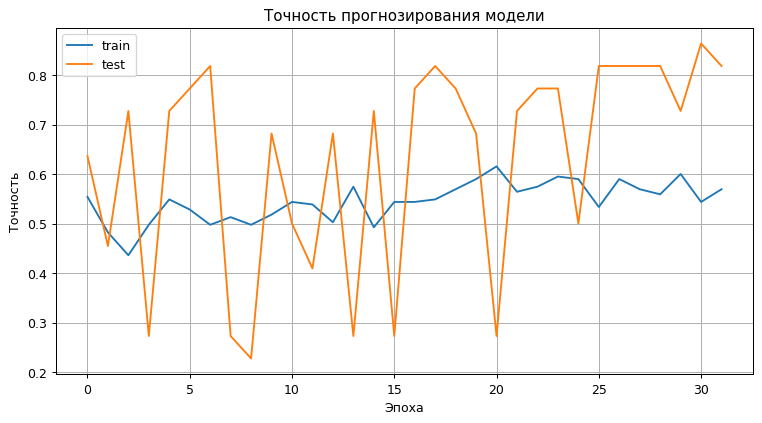

In [ ]:
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность прогнозирования модели')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')

Потери модели

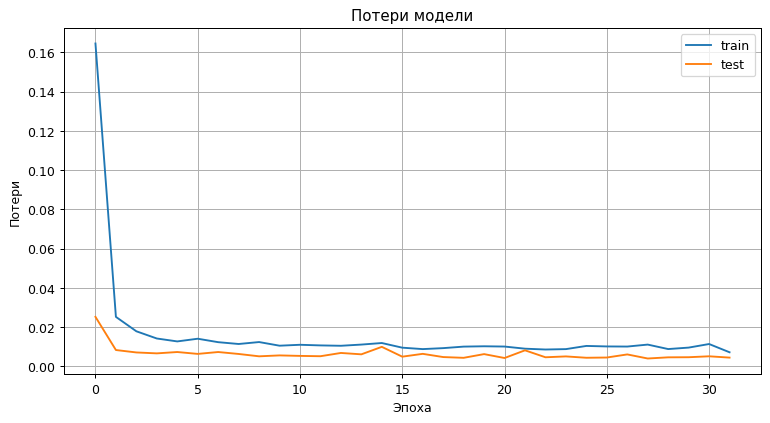

In [ ]:
plt.figure(figsize=(10, 5), dpi=90)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.grid()
plt.xlabel('Эпоха')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Работа с загруженной моделью

In [10]:
Loading_model = tf.keras.models.load_model(save_path)
Loading_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 9)                 0         
                                                                 
 dense_96 (Dense)            (None, 32)                320       
                                                                 
 dense_97 (Dense)            (None, 128)               4224      
                                                                 
 dense_98 (Dense)            (None, 256)               33024     
                                                                 
 dense_99 (Dense)            (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_100 (Dense)           (None, 2)               

## Визуализация архитектуры модели

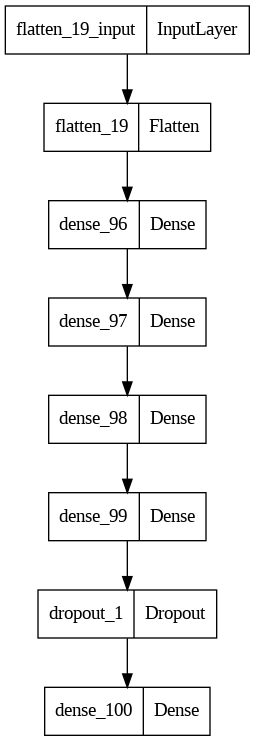

In [ ]:
keras.utils.plot_model(Loading_model, 'Model.png')

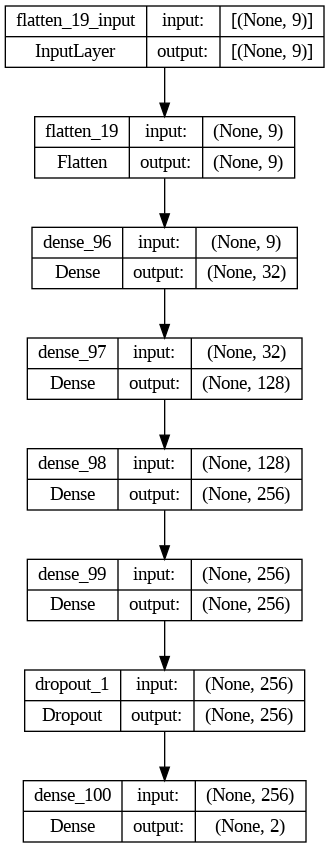

In [ ]:
keras.utils.plot_model(Loading_model, 'model_with_shape_info.png', show_shapes=True)

## Проверка точности предсказания

Пробное предсказание

In [11]:
data = [[ 0.944,  0.025, -0.011,  0.576,  0.000,  0.000,  0.000,  0.750, 0.000]] # X_valid[0]
print(f"Предсказание = {Loading_model.predict(data)}")
print(f"Реальное значение = 0.804  0.740]")

1/1 [==============================] - 0s 208ms/step
Предсказание = [[0.8474109  0.80723506]]
Реальное значение = 0.804  0.740]


In [16]:
test_arr = np.array(y_valid, ndmin=2)
predict_arr = np.array(X_valid, ndmin=2)
test_predict = Loading_model.predict(predict_arr)

1/1 [==============================] - 0s 104ms/step


### График тестовой выборки

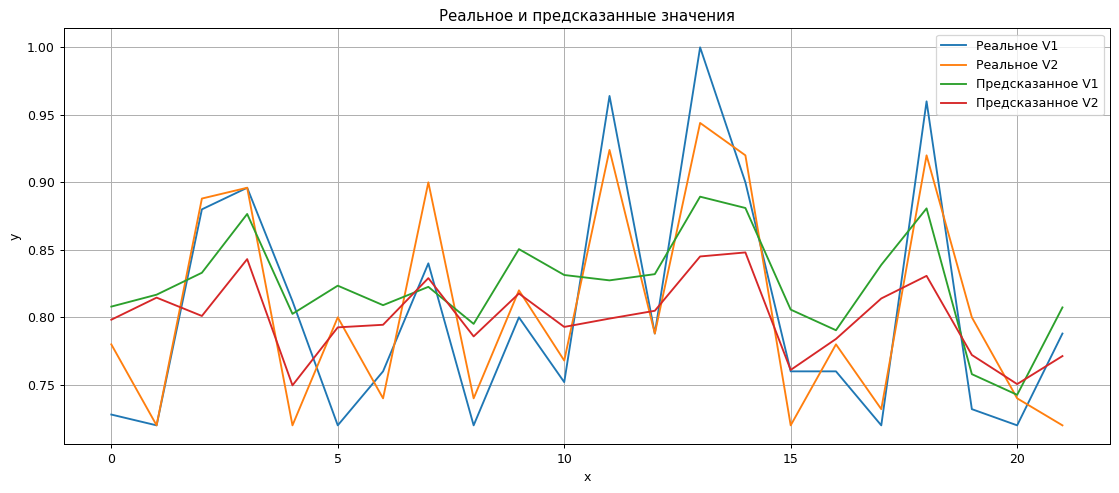

In [17]:
def plot_result(testY , test_predict):
    plt.figure(figsize=(15, 6), dpi=90)
    plt.plot(testY)
    plt.plot(test_predict)
    plt.legend(['Реальное V1', 'Реальное V2', 'Предсказанное V1', 'Предсказанное V2'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Реальное и предсказанные значения')
    plt.grid()
plot_result(test_arr, test_predict)

Прогон по тестовой выборке

In [20]:
for i in range(len(X_valid)):
  data = np.array(predict_arr[i], ndmin=2)
  y = Loading_model.predict(data)
  print(f" {i}-е Предсказание при вводных данных {data}  = {y}")
  print(f"{i}-е Реальное значение = {test_arr[i]} ")

1/1 [==============================] - 0s 24ms/step
 0-е Предсказание при вводных данных [[ 0.981  0.067 -0.037  0.479 -0.008 -0.008 -0.008  0.821  0.25 ]]  = [[0.80796355 0.7982451 ]]
0-е Реальное значение = [0.728 0.78 ] 
1/1 [==============================] - 0s 20ms/step
 1-е Предсказание при вводных данных [[ 0.963  0.018 -0.036  0.574 -0.008 -0.008 -0.008  0.922  0.375]]  = [[0.8167914 0.8146069]]
1-е Реальное значение = [0.72 0.72] 
1/1 [==============================] - 0s 22ms/step
 2-е Предсказание при вводных данных [[ 0.907  0.067 -0.054  0.479 -0.008 -0.008 -0.008  0.843  0.   ]]  = [[0.8330414 0.8010299]]
2-е Реальное значение = [0.88  0.888] 
1/1 [==============================] - 0s 24ms/step
 3-е Предсказание при вводных данных [[ 0.852  0.155 -0.017  0.636 -0.03   0.016  0.     0.949  0.   ]]  = [[0.8765735  0.84313095]]
3-е Реальное значение = [0.896 0.896] 
1/1 [==============================] - 0s 24ms/step
 4-е Предсказание при вводных данных [[ 0.926 -0.172  0.42

### Root Mean Square Error (RMSE) - Среднеквадратичное отклонение

In [19]:
def print_error(trainY, testY, train_predict, test_predict):
    # Ошибка предсказания
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Печать значений
    print('RMSE для тренировочной выборки: %.3f RMSE' % (train_rmse))
    print('RMSE для тестовой выборки: %.3f RMSE' % (test_rmse))

# Сделаем предсказания
train_predict = Loading_model.predict(X_train)
test_predict = Loading_model.predict(X_valid)
# Среднеквадратичное отклонение
print_error(y_train, y_valid, train_predict, test_predict)

1/1 [==============================] - 0s 21ms/step
RMSE для тренировочной выборки: 0.064 RMSE
RMSE для тестовой выборки: 0.065 RMSE


## Проверка скорости работы

С заранее смасштабированными данными

In [23]:
data = [[0.944, 0.025, -0.011, 0.576, 0.000, 0.000,  0.000,  0.750, 0.000]]
data_2 = [[0.926, 0.057, -0.091,  0.466, -0.008, -0.008, -0.008, 0.957, 0.025]]
data_3 = [[0.833, 0.169, -0.003, 0.437, 0.000, 0.000,  0.000,  0.853, 0.000]]
start_time = time.time()
Loading_model.predict(data)
Loading_model.predict(data_2)
Loading_model.predict(data_3)
time_for_operation = (time.time() - start_time)
print(f"Среднее время на расчёт = {round(time_for_operation / 3, 5)} секунд")

1/1 [==============================] - 0s 38ms/step
Среднее время на расчёт = 0.1048 секунд


Скорость расчёта при анализе пакета в 22 значения тестовой выборки

In [22]:
start_time = time.time()
predict_arr = np.array(X_valid, ndmin=2)
test_predict = Loading_model.predict(predict_arr)
time_for_operation = (time.time() - start_time)
print(f"Время на расчёт = {round(time_for_operation / 3, 5)} секунд")

1/1 [==============================] - 0s 36ms/step
Время на расчёт = 0.04792 секунд
